In [13]:
import pandas as pd
data = pd.read_csv('WineQT.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [14]:
data = data.drop(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'total sulfur dioxide', 'chlorides', 'free sulfur dioxide', 'density', 'sulphates', 'pH'], axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  1143 non-null   float64
 1   quality  1143 non-null   int64  
 2   Id       1143 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 26.9 KB


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree


          alcohol  quality    Id                Clasificación
0      9.40000000        5     0      Blanco y Espumoso bueno
1      9.80000000        5     1      Blanco y Espumoso bueno
2      9.80000000        5     2      Blanco y Espumoso bueno
3      9.80000000        6     3      Blanco y Espumoso bueno
4      9.40000000        5     4      Blanco y Espumoso bueno
5      9.40000000        5     5      Blanco y Espumoso bueno
6      9.40000000        5     6      Blanco y Espumoso bueno
7     10.00000000        7     7      Blanco y Espumoso bueno
8      9.50000000        7     8      Blanco y Espumoso bueno
9      9.20000000        5    10      Blanco y Espumoso bueno
10     9.90000000        5    12      Blanco y Espumoso bueno
11     9.10000000        5    13      Blanco y Espumoso bueno
12    10.50000000        7    16                 Rosado bueno
13     9.20000000        6    19      Blanco y Espumoso bueno
14     9.70000000        5    21      Blanco y Espumoso bueno
15     9

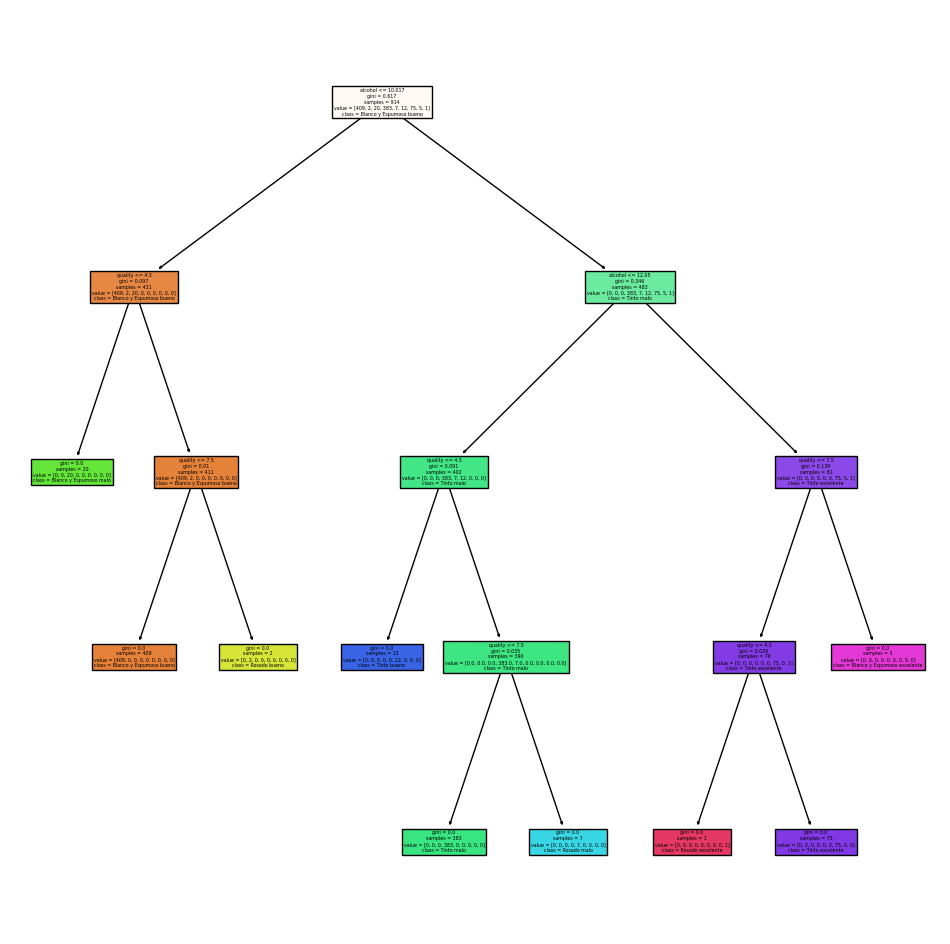

In [29]:
data['Clasificación'] = ''

for i in range(len(data)):
    # Blanco Espumoso
    if 8 <= data.loc[i, 'alcohol'] <= 10:
        if 1 <= data.loc[i, 'quality'] <= 4:
            data.loc[i, 'Clasificación'] = 'Blanco y Espumoso malo'
        elif 5 <= data.loc[i, 'quality'] <= 7:
            data.loc[i, 'Clasificación'] = 'Blanco y Espumoso bueno'
        elif 8 <= data.loc[i, 'quality'] <= 10:
            data.loc[i, 'Clasificación'] = 'Blanco y Espumoso excelente'
    # Rosado
    elif 10 <= data.loc[i, 'alcohol'] <= 12:
        if 1 <= data.loc[i, 'quality'] <= 4:
            data.loc[i, 'Clasificación'] = 'Rosado malo'
        elif 5 <= data.loc[i, 'quality'] <= 7:
            data.loc[i, 'Clasificación'] = 'Rosado bueno'
        elif 8 <= data.loc[i, 'quality'] <= 10:
            data.loc[i, 'Clasificación'] = 'Rosado excelente'
    # Tinto
    elif 12 <= data.loc[i, 'alcohol'] <= 16:
        if 1 <= data.loc[i, 'quality'] <= 4:
            data.loc[i, 'Clasificación'] = 'Tinto malo'
        elif 5 <= data.loc[i, 'quality'] <= 7:
            data.loc[i, 'Clasificación'] = 'Tinto bueno'
        elif 8 <= data.loc[i, 'quality'] <= 10:
            data.loc[i, 'Clasificación'] = 'Tinto excelente'
    else:
        data.loc[i, 'Clasificación'] = 'Sin clasificación'


# Imprimir el DataFrame ampliando los atributos de las columnas
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 8,
                       ):
    print(data)

# Dividir los datos en características (X) y variable objetivo (y)
x = data[['alcohol', 'quality']]
y = data['Clasificación']


# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier()

# Entrenar el modelo
model.fit(x_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(x_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Generar el árbol de decisión en un archivo de imagen (requiere la biblioteca graphviz)
tree.export_graphviz(model, out_file='tree.dot', feature_names=['alcohol', 'quality'], class_names=data['Clasificación'].unique())

# También puedes visualizar el árbol utilizando la biblioteca matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(model, feature_names=['alcohol', 'quality'], class_names=data['Clasificación'].unique(), filled=True, ax=ax)
plt.show()


    # if 8 <= data.loc[i, 'alcohol'] <= 10 and 1 <= data.loc[i, 'quality'] <= 4:
    #     data.loc[i, 'Clasificación'] = 'Blanco y Espumoso malo'
    # elif 8 <= data.loc[i, 'alcohol'] <= 10 and 5 <= data.loc[i, 'quality'] <= 7:
    #     data.loc[i, 'Clasificación'] = 'Blanco y Espumoso bueno'  
    # elif 8 <= data.loc[i, 'alcohol'] <= 10 and 8 <= data.loc[i, 'quality'] <= 10:
    #     data.loc[i, 'Clasificación'] = 'Blanco y Espumoso excelente'
    # # Rosado
    # elif 10 <= data.loc[i, 'alcohol'] <= 12 and 1 <= data.loc[i, 'quality'] <= 4:
    #     data.loc[i, 'Clasificación'] = 'Rosado malo' 
    # elif 10 <= data.loc[i, 'alcohol'] <= 12 and 5 <= data.loc[i, 'quality'] <= 7:
    #     data.loc[i, 'Clasificación'] = 'Rosado bueno'    
    # elif 10 <= data.loc[i, 'alcohol'] <= 12 and 8 <= data.loc[i, 'quality'] <= 10:
    #     data.loc[i, 'Clasificación'] = 'Rosado excelente'
    # # Tinto
    # elif 12 <= data.loc[i, 'alcohol'] <= 16 and 1 <= data.loc[i, 'quality'] <= 4:
    #     data.loc[i, 'Clasificación'] = 'Tinto malo'
    # elif 12 <= data.loc[i, 'alcohol'] <= 16 and 5 <= data.loc[i, 'quality'] <= 7:
    #     data.loc[i, 'Clasificación'] = 'Tinto bueno'
    # else:
    #     data.loc[i, 'Clasificación'] = 'Tinto excelente'


In [28]:
data[data['quality'] == 8 ]

,alcohol,quality,Id,Clasificación
190,12.8,8,267,Tinto excelente
197,12.6,8,278,Tinto excelente
271,12.9,8,390,Tinto excelente
310,9.8,8,440,Blanco y Espumoso excelente
321,13.4,8,455,Tinto excelente
340,11.7,8,481,Rosado excelente
349,11.0,8,495,Rosado excelente
352,11.0,8,498,Rosado excelente
419,14.0,8,588,Tinto excelente
747,12.5,8,1061,Tinto excelente
